In [0]:
# パッケージのインポート
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# データセットの準備
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
# データセットのシェイプの確認
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


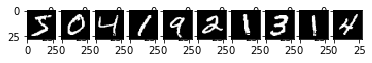

In [0]:
# データセットの画像の確認
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], 'gray')
plt.show()

In [0]:
# データセットのラベルの確認
print(train_labels[0:10])

[5 0 4 1 9 2 1 3 1 4]


In [0]:
# データセットの画像の前処理
train_images = train_images.reshape((train_images.shape[0], 784))
test_images = test_images.reshape((test_images.shape[0], 784))

# データセットの画像の前処理後のシェイプの確認
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [0]:
# データセットのラベルの前処理
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# データセットのラベルの前処理後のシェイプの確認
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


In [0]:
# モデルの作成
model = Sequential()
model.add(Dense(256, activation='sigmoid', input_shape=(784,))) # 入力層
model.add(Dense(128, activation='sigmoid')) # 隠れ層
model.add(Dropout(rate=0.5)) # ドロップアウト
model.add(Dense(10, activation='softmax')) # 出力層

In [0]:
# コンパイル
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['acc'])

In [0]:
# 学習
history = model.fit(train_images, train_labels, batch_size=500, 
    epochs=5, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 36us/sample - loss: 1.6872 - acc: 0.4570 - val_loss: 0.9593 - val_acc: 0.8463
Epoch 2/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.9088 - acc: 0.7503 - val_loss: 0.5725 - val_acc: 0.8845
Epoch 3/5
48000/48000 [==============================] - 2s 34us/sample - loss: 0.6540 - acc: 0.8203 - val_loss: 0.4303 - val_acc: 0.9005
Epoch 4/5
48000/48000 [==============================] - 2s 35us/sample - loss: 0.5379 - acc: 0.8531 - val_loss: 0.3633 - val_acc: 0.9088
Epoch 5/5
48000/48000 [==============================] - 2s 36us/sample - loss: 0.4698 - acc: 0.8702 - val_loss: 0.3249 - val_acc: 0.9134


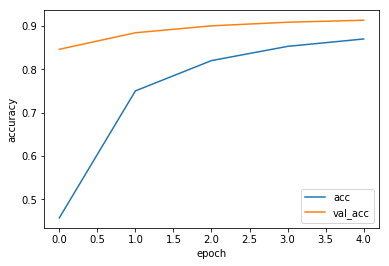

In [0]:
# グラフの表示
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [0]:
# 評価
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('loss: {:.3f}\nacc: {:.3f}'.format(test_loss, test_acc ))

10000/10000 [==============================] - 1s 50us/sample - loss: 0.3289 - acc: 0.9145
loss: 0.329
acc: 0.914


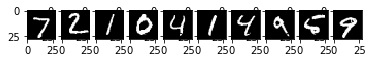

[7 2 1 0 4 1 4 9 6 9]


In [0]:
# 推論する画像の表示
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(test_images[i].reshape((28, 28)), 'gray')
plt.show()

# 推論したラベルの表示
test_predictions = model.predict(test_images[0:10])
test_predictions = np.argmax(test_predictions, axis=1)
print(test_predictions)